In [6]:
import pandas as pd
import matplotlib
import numpy
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
###Creating numpy arrays for labels and inputs

x = df.drop('Outcome',axis=1).values 
y=df['Outcome'].values

In [9]:
###test_train spli
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
##

In [15]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,output_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,output_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
        

In [16]:
#### We will instantiate our ANN model now

torch.manual_seed(42)
model=ANN_Model()


In [18]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [20]:
## We did forward propogation , now we wll move towards the backward propogation
# Define the loss function and optimizer
#CrossEntropy Loss is better for multiclassification problems
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [23]:
epochs = 450
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(x_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print(f"Epoch number: {i} and the loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch number: 1 and the loss : 0.3478096127510071
Epoch number: 11 and the loss : 0.3519694209098816
Epoch number: 21 and the loss : 0.34109634160995483
Epoch number: 31 and the loss : 0.33720123767852783
Epoch number: 41 and the loss : 0.3357747495174408
Epoch number: 51 and the loss : 0.3389549255371094
Epoch number: 61 and the loss : 0.33916524052619934
Epoch number: 71 and the loss : 0.3356796205043793
Epoch number: 81 and the loss : 0.3269352316856384
Epoch number: 91 and the loss : 0.345655620098114
Epoch number: 101 and the loss : 0.33781442046165466
Epoch number: 111 and the loss : 0.3644885718822479
Epoch number: 121 and the loss : 0.365628719329834
Epoch number: 131 and the loss : 0.3675089180469513
Epoch number: 141 and the loss : 0.3344127833843231
Epoch number: 151 and the loss : 0.32860302925109863
Epoch number: 161 and the loss : 0.3236183524131775
Epoch number: 171 and the loss : 0.3339780569076538
Epoch number: 181 and the loss : 0.32459309697151184
Epoch number: 191 a

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

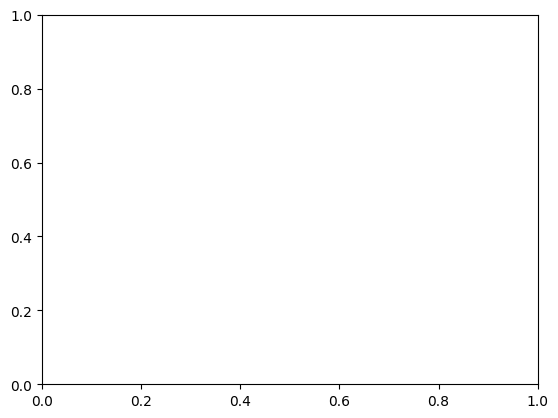

In [29]:
plt.plot(epochs,final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [33]:
predictions =[]
with torch.no_grad():
    
    for i,data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [16, 31]])

Text(95.72222222222221, 0.5, 'Predicted Values')

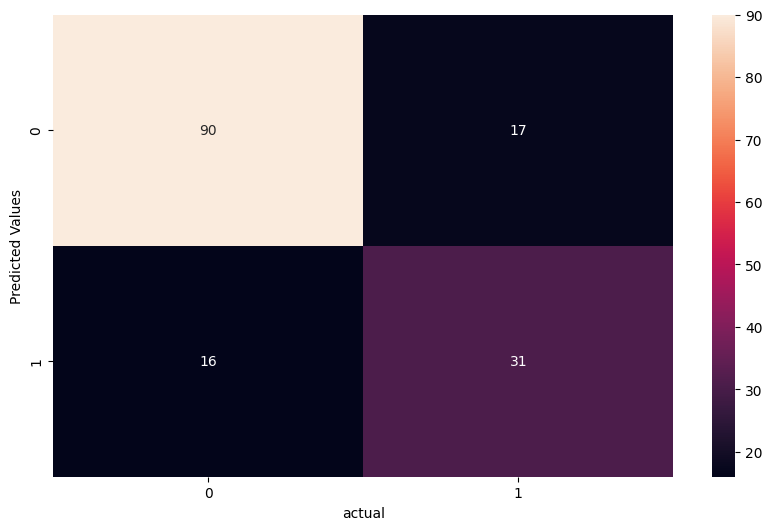

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual')
plt.ylabel('Predicted Values')

In [37]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

0.7857142857142857

In [38]:
### Now we will save the model
torch.save(model,'diabetes.pt')

In [39]:
model=torch.load('diabetes.pt')

In [40]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [42]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [44]:
list1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [45]:
torch.tensor(list1)

tensor([  6.0000, 130.0000,  72.0000,  40.0000,   0.0000,  25.6000,   0.6270,
         45.0000])

In [46]:
new_data = torch.tensor(list1)

In [48]:
with torch.no_grad():
    
        print(model(new_data).argmax().item())
    

           

0
